<a href="https://colab.research.google.com/github/SemenutaEgor/Extreme-events-in-phenomenological-neural-networks-with-different-types-of-connections/blob/master/Dragon_king_like_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#задаём параметры, функцию гамма и саму систему из двух связных нейронов
a = 1
b = 3
c = 1
d = 5
x_r = -1.6
r = 0.01
s = 5
I = 4
v_s = 2
lambd = 10
Theta = -0.25

Gamma = lambda x_i: 1 / (1 + np.exp(-lambd * (x_i - Theta)))

def two_HRs(t, X, k1, k2):
    x1, y1, z1, x2, y2, z2  = X
    dx1 = y1 - a*x1**3 + b*x1**2 -z1 + I - k1*(x1 - v_s) * Gamma(x2)
    dy1 = c - d*x1**2 - y1
    dz1 = r*(s*(x1 - x_r) - z1)
    
    dx2 = y2 - a*x2**3 + b*x2**2 -z2 + I - k2*(x2 - v_s) * Gamma(x1)
    dy2 = c - d*x2**2 - y2
    dz2 = r*(s*(x2 - x_r) - z2)
    return [dx1, dy1, dz1, dx2, dy2, dz2]

In [3]:
k1 = -0.17
k2 = -0.17

initials = [-1.5, 0, 0, -1.5, 0, 0]

sol = solve_ivp(two_HRs, [0, 50000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2))
ts = sol.t
x1s, y1s, z1s, x2s, y2s, z2s = sol.y

In [4]:
x1s = np.array(x1s)
x2s = np.array(x2s)

xsum = x1s + x2s

ts_a = ts[120000:]
xsum_a = xsum[120000:]

# initials = [x1s[-1], y1s[-1], z1s[-1], x2s[-1], y2s[-1], z2s[-1]]

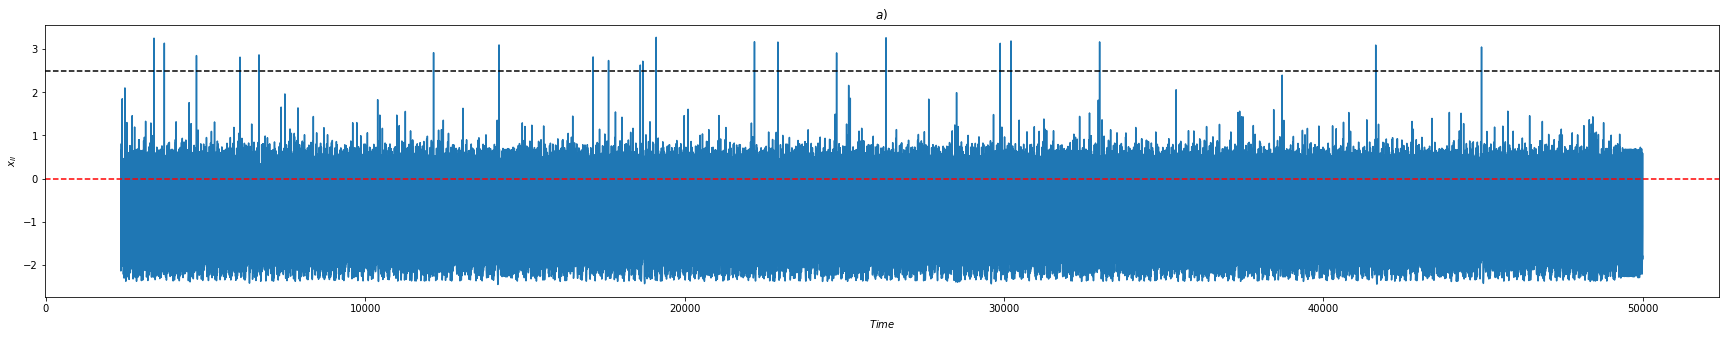

In [5]:
Hee = 2.5

fig = plt.figure(figsize = (30, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot (ts_a, xsum_a)
plt.axhline(y = Hee, color ="black", linestyle ="--")
plt.axhline(y = 0, color ="red", linestyle ="--")
ax.set_xlabel("$Time$")
ax.set_ylabel("$x_{II}$")
plt.title("$a)$")
plt.show();

In [6]:
xsum_a.size

2471580

In [21]:
L2 = xsum_a.size
Hs = np.linspace(1.2, 4.0, L2)
eps = 0.07

lents = len(ts_a)
lenHs = len(Hs)

all_spikes = (xsum_a>0).sum()

spike_counter = np.array([((xsum_a >= Hs[j]) & (xsum_a < Hs[j]+eps)).sum() for j in range(lenHs)])


prob_arr = spike_counter / all_spikes

print(prob_arr)

# print(all_spikes)
# print(all_spikes1)


[0.0036871 0.0036871 0.0036871 ... 0.        0.        0.       ]


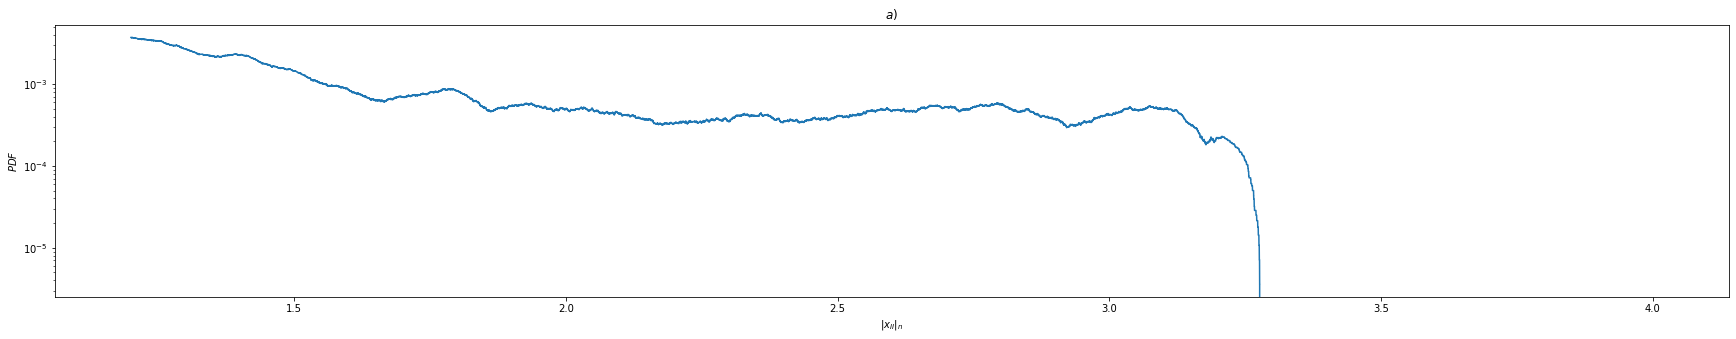

In [29]:
fig = plt.figure(figsize = (30, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(Hs, prob_arr)
ax.set_yscale('log', basey=10)
ax.set_xlabel("$|x_{II}|_{n}$")
ax.set_ylabel("$PDF$")
plt.title("$a)$")
plt.show();